<a href="https://colab.research.google.com/github/shreyasathreyas/DataVizFall2020_Colab/blob/master/Class_Activity_Lec03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize New York times database for COVID-19
## Case study Bristol and Suffolk, MA

## Loading US County Level Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# https://github.com/nytimes/covid-19-data repository location
db = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
## loading data into dataframe


# Explore data

In [ ]:
df = pd.read_csv(db)
df.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [ ]:
df.nunique()

date        234
county     1923
state        55
fips       3205
cases     16026
deaths     2381
dtype: int64

In [ ]:
# let us get fips for 2 counties  (Bristol and Suffolk, MA)
## fips stands for : Federal Information Processing Standards
Bristol_fips = df[(df['county'] == 'Bristol') & (df['state'] == 'Massachusetts')]['fips'].unique()[0].astype('int')
Suffolk_fips = df[(df['county'] == 'Bristol') & (df['state'] == 'Massachusetts')]['fips'].unique()[0].astype('int')

print(f'Bristol = {Bristol_fips}')
print(f'Suffolk = {Suffolk_fips}')

Bristol = 25005
Suffolk = 25005


In [ ]:
def get_county_stat(df,fips):
  result = df[df['fips'] == fips][['date','county','state','cases','deaths']].copy()
  result.set_index('date',inplace = True)
  result.index = pd.to_datetime(result.index)
  return result

get_county_stat(df,Bristol_fips).head()

,county,state,cases,deaths
date,,,,
2020-03-14,Bristol,Massachusetts,1,0
2020-03-15,Bristol,Massachusetts,1,0
2020-03-16,Bristol,Massachusetts,2,0
2020-03-17,Bristol,Massachusetts,5,0
2020-03-18,Bristol,Massachusetts,5,0


## Explore data type

In [ ]:
df_Bristol = get_county_stat(df,25005)
df_Suffolk = get_county_stat(df,25025)

Text(0.5, 1.0, 'Deathe Comparison')

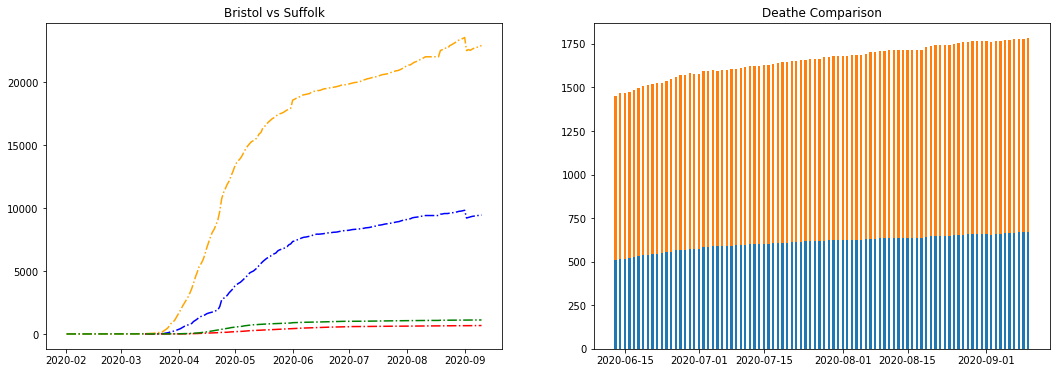

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(df_Bristol.index,df_Bristol.cases,'-.',color = 'blue',label = 'Bristol cases')
ax[0].plot(df_Bristol.index,df_Bristol.deaths,'-.',color = 'red',label = 'Bristol deaths')

ax[0].plot(df_Suffolk.index,df_Suffolk.cases,'-.',color = 'orange',label = 'Suffolk cases')
ax[0].plot(df_Suffolk.index,df_Suffolk.deaths,'-.',color = 'green',label = 'Suffolk deaths')

width = 0.5
past = -90
axis1 = ax[1].bar(df_Bristol.index[past:],df_Bristol.deaths[past:], width,label = 'Bristol')
axis2 = ax[1].bar(df_Suffolk.index[past:],df_Suffolk.deaths[past:], width,bottom = df_Bristol.deaths[past:], label = 'Suffolk')
ax[0].set_title('Bristol vs Suffolk')
ax[1].set_title('Deathe Comparison')


## Top 10 counties by number of cases and deaths 



```
# This is formatted as code
```





In [79]:

df.groupby(['county','state']).sum().reset_index().sort_values(by = ['cases','deaths'],ascending = False)[['county','cases','state','deaths']].head(10)


,county,cases,state,deaths
2106,New York City,32932301,New York,3269101
1748,Los Angeles,17648775,California,503886
647,Cook,12938461,Illinois,585006
1949,Miami-Dade,9824146,Florida,175400
1821,Maricopa,9051131,Arizona,181030
1236,Harris,6550960,Texas,113716
2085,Nassau,6377861,New York,369712
2771,Suffolk,6234841,New York,278679
3139,Westchester,5311253,New York,217049
733,Dallas,4635688,Texas,66967


## Death rate Per FIPS 

In [76]:
df.sort_values(['date','fips'])
df['daily_cases'] = df.groupby('fips')['cases'].diff().fillna(0)
df['daily_cases'] = df['daily_cases'].rolling(window = 3).max()

df['death_cases'] = df.groupby('fips')['deaths'].diff().fillna(0)
df['death_cases'] = df['death_cases'].rolling(window = 3).max()

x = df.groupby(['fips','county'], as_index = False).sum()

x['death_rate'] = x['death_cases']/x['daily_cases']*100
x[['fips','death_rate']]



,fips,death_rate
0,1001.0,2.007528
1,1003.0,1.351616
2,1005.0,1.410658
3,1007.0,1.118568
4,1009.0,1.366607
...,...,...
3200,72151.0,0.000000
3201,72153.0,0.000000
3202,78010.0,1.757812
3203,78020.0,1.716738


## <font color = red> Bonus Point</font>

### A function that makes "Folium Choropleth Map" for Weekly Cases, Weekly Deaths and Weekly Mortality Rate </font>

ALL COUNTIES

<br>

### def Folium_Choropleth(type = 'cases',date=''):

<br>

## Due for Bonus point : Friday (09/11/2020 11:59pm)

In [ ]:
import folium
import os